In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#--------------------------------------------------------------------
#đọc data và lấy ra các cột cần thiết
data = pd.read_csv('/content/drive/MyDrive/DATA COLAB/DATA_house_price.txt')
f = ['price', 'sqft_living', 'bedrooms']
data = data[f]

In [8]:
data.head()

,price,sqft_living,bedrooms
0,221900.0,1180,3
1,538000.0,2570,3
2,180000.0,770,2
3,604000.0,1960,4
4,510000.0,1680,3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   sqft_living  21597 non-null  int64  
 2   bedrooms     21597 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 506.3 KB


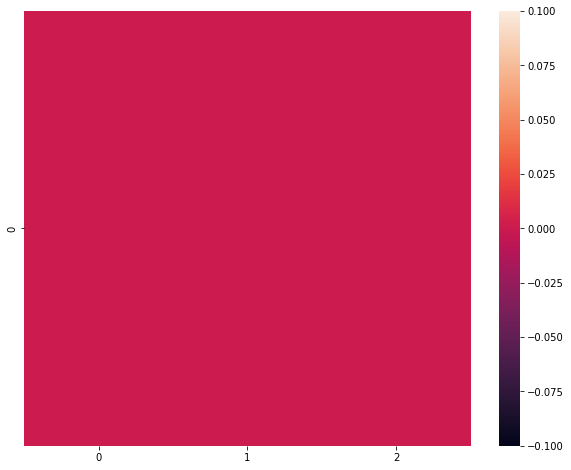

In [16]:
#Kiem tra các giá trị rỗng
plt.figure(figsize=[10, 8])
data_check = np.asarray(data.isna().sum()).reshape(1, 3)
sns.heatmap(data=data_check)
# -> Khong co gia tri rong

In [19]:
def outlier_check(df):
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=[20, 10])
    axs = axs.flatten()
    index = 0
    for a, b in df.items():
        sns.boxplot(y=a, data=df, ax=axs[index])
        index += 1

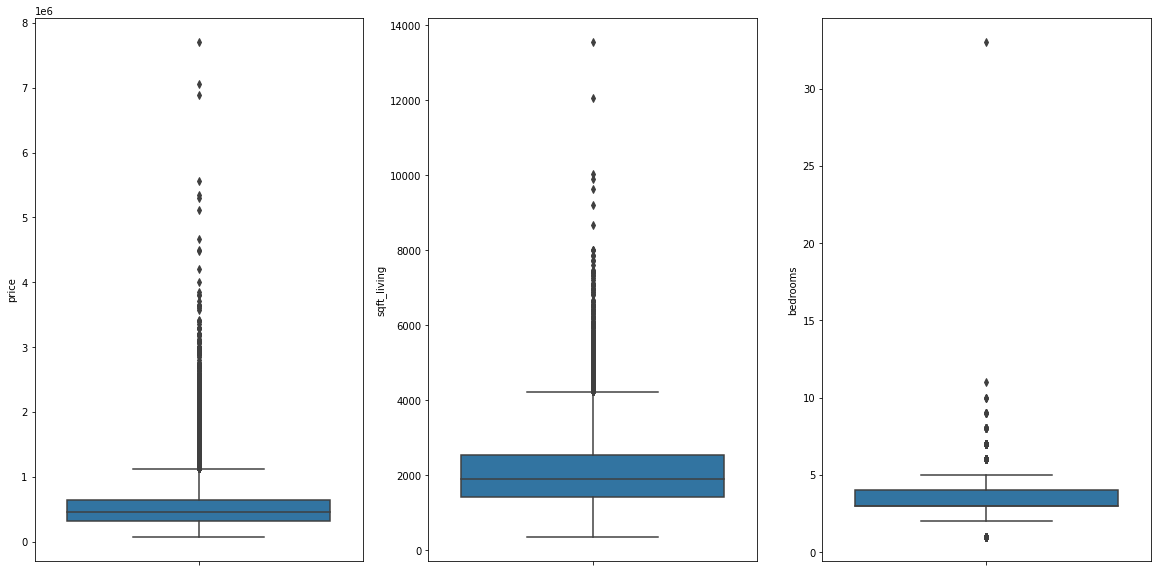

In [20]:
outlier_check(data)


In [ ]:

#xóa các ḍng bị thiếu data
data = data.dropna()

In [ ]:

#rescale cho data nhỏ lại
data['price'] = data['price']/1000000.0 # 200.000 $ = 0.2 triệu $
data['sqft_living'] = data['sqft_living']/10000.0 #đơn vị 1 hec-ta = 10000 m^2
data['bedrooms'] = data['bedrooms']/10.0 #ví dụ: 0.3 = 3 phòng

In [ ]:
#data dã được chuẩn hóa
#từ DataFrame sang mảng dữ liệu nhiều chiều (ndarray)
maTran = data.values  
m,n = maTran.shape
m = 10000 #1/2 file data
m_Train = int((70 * m)/100)
maTran_Train = maTran[0 : m_Train] #lấy 70% data để train
maTran_Test = maTran[m_Train : m]   #lấy 30% data để test

x = maTran_Train[:,1:n] # lấy cột ['sqft_living', 'bedrooms']
X = np.insert(x, 0, values = 1, axis = 1) #chèn thêm cột 1 : [1, 'sqft_living', 'bedrooms']
y = maTran_Train[:,0]  # lấy cột['price']

theta = np.ones((1, n)) #[[1. 1. 1. ]]

In [ ]:
#--------------------------------------------------------------------
def h_X(X, theta): #y^ = X * theta
    return np.dot(X, theta.T)

def computeCost(X, y, theta): #J = 1/2m * sum((yi^  - yi)^2)
    saiSo = np.power((h_X(X, theta) - y),2)
    J = (1.0/(2 * len(X))) * np.sum(saiSo)
    return J

def gradientDescent(X, y, theta, alpha, soLanLap):
    theta_tam = np.zeros(theta.shape) 
    heso_Theta = theta.shape[1]
    J_tam = np.zeros(soLanLap + 1)
    J_tam[0] = computeCost(X, y, theta)
    for i in range(1, soLanLap + 1):
        saiSo = h_X(X,theta) - y
        for j in range(heso_Theta):
            X_ij = np.reshape(X[:, j],(len(X),1))
            term = np.multiply(saiSo, X_ij)
            theta_tam[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
        theta = theta_tam
        J_tam[i] = computeCost(X, y, theta)
        #nếu cost ko còn giảm quá nhiều thì coi như tối ưu
        if np.round(J_tam[i - 1], 1) == np.round(J_tam[i], 1):
            print('Reach optima at I = %d; J = %.6f'%(i, J_tam[i]))
            break
    return i, theta, J_tam

def predictPrice(sqft_living, bedrooms):
    sqft_living = sqft_living/10000.0
    bedrooms = bedrooms/10.0
    price = theta_final[0][0] + theta_final[0][1]*sqft_living + theta_final[0][2]*bedrooms
    return (price * 1000000.0)

In [ ]:
#--------------------------------------------------------------------
alpha = 0.00001 #learning_rate
soLanLap = 1000 #nếu loss chưa giảm thì tăng thêm
op, theta_final, J_chiphi = gradientDescent(X, y, theta, alpha, soLanLap)

Reach optima at I = 64; J = 535.055288


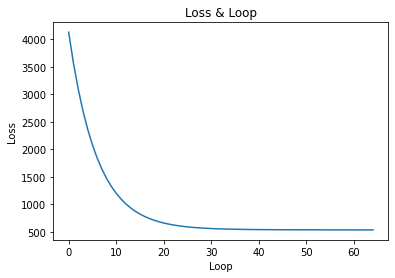

In [ ]:
#vẽ đồ thì loss và số lần lặp
plt.plot([z for z in range(0, op + 1)], J_chiphi[0: (op + 1)])
plt.title('Loss & Loop')
plt.xlabel('Loop')
plt.ylabel('Loss')
plt.show()


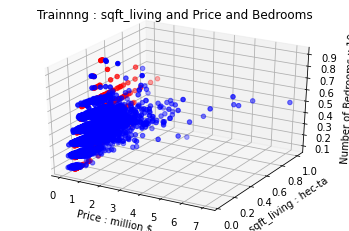

In [ ]:
#vẽ đồ thị 3d : data train, linear
ax = plt.axes(projection ="3d")
ax.scatter3D(maTran_Train[:,0], maTran_Train[:,1], maTran_Train[:,2], color ='blue',)
ax.set_title('Trainnng : sqft_living and Price and Bedrooms')
ax.set_xlabel('Price : million $')
ax.set_ylabel('sqft_living : hec-ta')
ax.set_zlabel('Number of Bedrooms x 10')

predict = h_X(X, theta_final)

ax.scatter3D(predict[:][0], maTran_Train[:,1], maTran_Train[:,2], color ='red')
plt.show()# Show plot

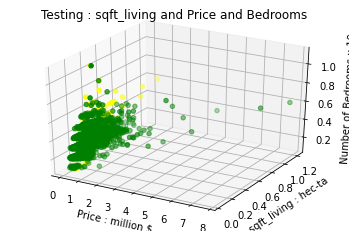

In [ ]:
#vẽ đồ thị 3d : data test, linear
ax = plt.axes(projection ="3d")
ax.scatter3D(maTran_Test[:,0], maTran_Test[:,1], maTran_Test[:,2], color ='green')
ax.set_title('Testing : sqft_living and Price and Bedrooms')
ax.set_xlabel('Price : million $')
ax.set_ylabel('sqft_living : hec-ta')
ax.set_zlabel('Number of Bedrooms x 10')

x = maTran_Test[:,1:n] # lấy cột ['sqft_living', 'bedrooms']
X = np.insert(x, 0, values = 1, axis = 1) #chèn thêm cột 1 : [1, 'sqft_living', 'bedrooms']
predict1 = h_X(X, theta_final) # dự đoán cho test

ax.scatter3D(predict1[:][0], maTran_Test[:,1], maTran_Test[:,2], color ='yellow')
plt.show()# Show plot

In [ ]:

#4. dự đoán giá
print('>>>Prediction')
while True:
    sqft_living = float(input('sqft_living m^2 : '))
    bedrooms = float(input('bedrooms : '))
    print('Predict price $: ', predictPrice(sqft_living, bedrooms))
    yn = int(input('Stop? 1 : YES | 0 : NO : '))
    if yn == 1:
        break


>>>Prediction
